In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('ecommerce.csv')

In [4]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
data.drop(['Email', 'Address', 'Avatar'], axis=1, inplace=True)

In [10]:
# split Train Test
from sklearn.model_selection import train_test_split

In [11]:
# set X and y
X = data.drop('Yearly Amount Spent', axis=1)
y = data['Yearly Amount Spent']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [14]:
X_train.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
205,34.967610,13.919494,37.952013,5.066697
404,32.278443,12.527472,36.688367,3.531402
337,31.827979,12.461147,37.428997,2.974737
440,33.200616,11.965980,36.831536,3.549036
55,33.925297,11.588655,35.252242,3.392050


In [16]:
# linear regression model
import statsmodels.api as sm

In [17]:
lm = sm.OLS(y_train, X_train).fit()

In [18]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.998
Model:                             OLS   Adj. R-squared (uncentered):              0.998
Method:                  Least Squares   F-statistic:                          4.798e+04
Date:                 Thu, 25 Feb 2021   Prob (F-statistic):                        0.00
Time:                         13:16:50   Log-Likelihood:                         -1820.0
No. Observations:                  400   AIC:                                      3648.
Df Residuals:                      396   BIC:                                      3664.
Df Model:                            4                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Avg. Session Length     11.9059      0.869     13.696      0.000      10.197      13.615
Time on App             34.3257      1.121     30.610      0.000      32.121      36.530
Time on Website        -14.1405      0.812    -17.405      0.000     -15.738     -12.543
Length of Membership    61.0149      1.144     53.318      0.000      58.765      63.265
==============================================================================
Omnibus:                        0.490   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.783   Jarque-Bera (JB):                0.606
Skew:                          -0.022   Prob(JB):                        0.739
Kurtosis:                       2.814   Cond. No.                         55.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# prediction
pred = lm.predict(X_test)

In [21]:
pred

69     418.211323
29     567.097473
471    534.706617
344    425.690888
54     474.931682
          ...    
460    570.877250
152    564.267305
154    557.093996
56     489.285778
392    550.720695
Length: 100, dtype: float64

/Users/yangjaeug/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Yearly Amount Spent'>

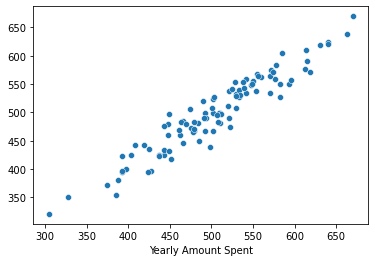

In [26]:
sns.scatterplot(y_test, pred)